In [1]:
pip install censusdata

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import censusdata

In [3]:
sample = censusdata.search('acs5', 2015,'concept', 'transportation')

In [4]:
len(sample)

1816

In [5]:
states = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)

In [6]:
states["Florida"]

censusgeo((('state', '12'),))

In [7]:
data = censusdata.download('acs5', 2015,
           censusdata.censusgeo([('state', '12'),
                                 ('county', '081'),
                                 ('block group', '*')]),
          ['B23025_001E', 'B23025_002E', 'B23025_003E',
           'B23025_004E', 'B23025_005E',
           'B23025_006E', 'B23025_007E'])

In [8]:
# data.to_excel("Florida_Census.xlsx")

In [9]:
contacts = pd.read_excel("Contacts.xlsx")

In [10]:
len(contacts)

400

In [11]:
contacts = pd.read_excel("Contacts.xlsx")
cl = []
for i, r in contacts.iterrows():
    print(i)
    if("." in r[0]):
        cl.append(r[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
a = ""
for i in cl:
    a = a + ", " + i

In [13]:
a

', zyda@usc.edu, chongwuz@usc.edu, zelada@usc.edu, azahid@usc.edu, yortsos@usc.edu, eyokas@usc.edu, kyao@isi.edu, syamash@usc.edu, ayam@usc.edu, phw@usc.edu, willner@usc.edu, wiedem@usc.edu, jwhalen@isi.edu, arnolde@usc.edu, kennywan@usc.edu, vahi@isi.edu, fudwadia@usc.edu, trifunac@usc.edu, mtodorov@usc.edu, timpke@usc.edu, atanguay@usc.edu, dtang@usc.edu, takimoto@usc.edu, pszekely@isi.edu, costas@usc.edu, gaurav@usc.edu, dominik@isi.edu, msilva@usc.edu, amy.schroeder@usc.edu, tsakai@usc.edu, safadi@usc.edu, raghu@usc.edu, yuri@isi.edu, tpink@usc.edu, bpierce@usc.edu, nicholep@usc.edu, laura@isi.edu, kpalmer@usc.edu, mdorosz@isi.edu, knomura@usc.edu, vincentn@usc.edu, uneumann@usc.edu, koolmano@usc.edu, ubli@usc.edu, jeffrey.miller@usc.edu, michael@mosis.com, smv@usc.edu, vzm@usc.edu, judylee@usc.edu, cmah@isi.edu, maarek@usc.edu, lidar@usc.edu, bleon@wesrac.usc.edu, lifengle@usc.edu, cckuo@sipi.usc.edu, skrimm@isi.edu, kosko@usc.edu, koffman@usc.edu, skoenig@usc.edu, lking@usc.edu, 

In [14]:
import urllib, json, requests

In [15]:
# with urllib.request.urlopen("https://geo.fcc.gov/api/census/area?lat=42.3295&lon=-71.0826&format=json") as url:
#     data = json.loads(url.read().decode())
#     print(data)

In [16]:
# https://geo.fcc.gov/api/census/block/find?latitude=25.65297847&longitude=-80.41389258&censusYear=2020&format=xml

In [17]:
import pandas as pd
import numpy as np

In [18]:
tj_max_florida = pd.read_csv("tj florida.csv")

In [19]:
tj_max_florida.head(5)

,Rank,Name,Store ID,Total Visits,lat,lng
0,1,"T.J. Maxx / 13580 SW 120th St, Miami, FL, Unit...",1101,1134979,25.652978,-80.413893
1,2,"T.J. Maxx / 1009 NW 76th Blvd, Gainesville, FL...",603,827305,29.662078,-82.422818
2,3,"T.J. Maxx / 6625 North Davis Highway, Florida,...",330,817421,30.492953,-87.226883
3,4,"T.J. Maxx / 6330 Lantana Rd, Lake Worth, FL, U...",1103,802937,26.587566,-80.145097
4,5,"T.J. Maxx / 391 N Alafaya Trl, Orlando, FL, Un...",20,768982,28.553691,-81.199645


In [20]:
import xml.etree.ElementTree as ET

In [21]:
fips = []
for index, rows in tj_max_florida.iterrows():
    lat = rows[4]
    lon = rows[5]
    params = {"latitude" : lat, "longitude" : lon, "censusYear" : "2020", "format": "xml"}
#     request = requests.get("https://geo.fcc.gov/api/census/block/find?latitude={lat}&longitude={lon}&censusYear=2020&format=xml")
    request = requests.get("https://geo.fcc.gov/api/census/block/find", params = params)
#     print(request)
#     data = request.text
#     print(data)
#     xml_data = ET.parse(data)
#     print(xml_data)   
    d1 = request.content
    root = ET.fromstring(d1)
    for child in root:
#         print(child.tag, child.attrib)
#         print(child.attrib["FIPS"])
        if(child.tag == "County"):
#             print(child.attrib["FIPS"])
#             print(str(child.attrib["FIPS"]))
            fips.append((child.attrib["FIPS"])[3:])
    

In [22]:
tj_max_florida["FIPS"] = fips

In [23]:
transport_florida = pd.read_csv("Transport Florida.csv")

In [24]:
transport_florida.head(5)

,COUNTY,SITE,BEGDATE,DIR,HR1,HR2,HR3,HR4,HR5,HR6,...,HR20,HR21,HR22,HR23,HR24,TOTVOL,PEAKHR,PEAKVOL,TYPE,TRUCKS
0,93,10,4/29/2020,N,21,19,12,6,11,32,...,423,293,204,120,80,9087,13,756,NaN,NaN
1,93,10,4/29/2020,S,30,25,16,9,16,48,...,377,285,156,119,68,8898,14,752,NaN,NaN
2,87,31,4/29/2020,E,106,68,64,73,96,331,...,813,626,468,376,128,17371,8,1298,NaN,NaN
3,87,31,4/29/2020,W,153,76,50,47,51,150,...,998,865,581,474,306,18362,16,1760,NaN,NaN
4,29,37,4/29/2020,E,8,6,15,18,29,75,...,123,70,50,25,19,2911,9,222,NaN,NaN


In [25]:
tf = transport_florida.groupby(["COUNTY"], as_index = False).sum()

In [26]:
cv = {}
for index, rows in tf.iterrows():
#     print(rows)
#     print(rows[0])
    cv[int(rows[0])] = rows["TOTVOL"]

cv

{1: 82963.0,
 2: 33896.0,
 3: 187355.0,
 4: 18792.0,
 5: 3766.0,
 7: 30050.0,
 8: 28657.0,
 9: 13146.0,
 10: 641531.0,
 11: 44590.0,
 12: 123331.0,
 13: 72165.0,
 14: 134488.0,
 15: 123101.0,
 16: 190749.0,
 17: 141465.0,
 18: 68963.0,
 26: 95431.0,
 27: 2822.0,
 28: 19030.0,
 29: 78466.0,
 30: 2529.0,
 32: 52343.0,
 33: 4164.0,
 34: 28800.0,
 35: 21899.0,
 36: 132249.0,
 37: 23571.0,
 38: 1817.0,
 46: 106648.0,
 47: 15143.0,
 48: 177096.0,
 49: 3812.0,
 50: 34555.0,
 51: 4437.0,
 52: 2120.0,
 53: 49497.0,
 54: 20861.0,
 55: 106637.0,
 56: 2399.0,
 57: 148011.0,
 58: 18379.0,
 59: 15042.0,
 60: 35286.0,
 61: 12269.0,
 70: 223442.0,
 71: 49940.0,
 72: 379496.0,
 73: 27165.0,
 74: 67674.0,
 75: 244844.0,
 76: 28731.0,
 77: 116736.0,
 78: 71334.0,
 79: 142830.0,
 86: 533703.0,
 87: 386795.0,
 88: 23194.0,
 89: 105562.0,
 90: 52156.0,
 92: 50730.0,
 93: 560540.0,
 94: 53153.0,
 97: 425091.0}

In [27]:
traffic = []
for index, rows in tj_max_florida.iterrows():
    if(rows[0] in cv.keys()):
        traffic.append(cv[int(rows[0])])
    else:
        traffic.append(0)

In [28]:
tj_max_florida["Traffic"] = traffic

In [29]:
tj_max_florida.head(5)

,Rank,Name,Store ID,Total Visits,lat,lng,FIPS,Traffic
0,1,"T.J. Maxx / 13580 SW 120th St, Miami, FL, Unit...",1101,1134979,25.652978,-80.413893,86,82963.0
1,2,"T.J. Maxx / 1009 NW 76th Blvd, Gainesville, FL...",603,827305,29.662078,-82.422818,01,33896.0
2,3,"T.J. Maxx / 6625 North Davis Highway, Florida,...",330,817421,30.492953,-87.226883,33,187355.0
3,4,"T.J. Maxx / 6330 Lantana Rd, Lake Worth, FL, U...",1103,802937,26.587566,-80.145097,99,18792.0
4,5,"T.J. Maxx / 391 N Alafaya Trl, Orlando, FL, Un...",20,768982,28.553691,-81.199645,95,3766.0


<AxesSubplot:xlabel='Traffic'>

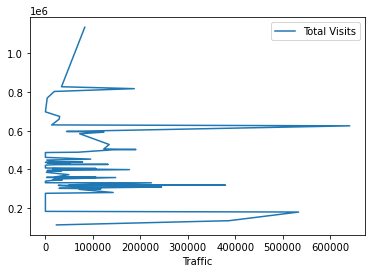

In [30]:
tj_max_florida.plot("Traffic", "Total Visits")

In [31]:
# tj_max_florida.to_excel("TJ_Traffic.xlsx")

In [32]:
# import geopandas as gpd



In [33]:
import pandas as pd

In [34]:
fl_property = pd.read_excel("FloridaPropertyData.xlsx")

In [35]:
print(fl_property.shape)
n_lat = 0.013 
n_lon = 0.016


# lat = 25
# lon = -80

(7537, 37)


In [36]:
f = fl_property[fl_property["PROPERTY_LATITUDE"] >= (lat - n_lat)]
f = f[f["PROPERTY_LATITUDE"] <= (lat + n_lat)]
f = f[f["PROPERTY_LONGITUDE"] >= (lon - n_lon)]
f = f[f["PROPERTY_LONGITUDE"] <= (lon + n_lon)]

f.shape
# f["PROPERTY_UNITS"].head(10)

(17, 37)

In [37]:
property_ratings = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-"]
property_ratings_quantify = [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
d = {}
for i in range(len(property_ratings)):
    d[property_ratings[i]] = property_ratings_quantify[i]

print(d)
print(fl_property["PROPERTY_LOCRATING"].head(5))
print(type(fl_property["PROPERTY_LOCRATING"][0]))

f2 = fl_property.copy()

{'A+': 12, 'A': 11, 'A-': 10, 'B+': 9, 'B': 8, 'B-': 7, 'C+': 6, 'C': 5, 'C-': 4, 'D+': 3, 'D': 2, 'D-': 1}
0     C
1     C
2    C+
3    B-
4    B-
Name: PROPERTY_LOCRATING, dtype: object
<class 'str'>


In [38]:
fl_property["PROPERTY_LOCRATING"] = fl_property["PROPERTY_LOCRATING"].map(d)
# fl_property = fl_property.replace({"PROPERTY_LOCRATING"}: d)
fl_property["PROPERTY_LOCRATING"].head(5)

0    5.0
1    5.0
2    6.0
3    7.0
4    7.0
Name: PROPERTY_LOCRATING, dtype: float64

In [39]:
f = f.dropna(subset = ["PROPERTY_UNITS", "PROPERTY_SQFT", "PROPERTY_CURRENT_RENT"])
f["PROPERTY_UNITS"] = pd.to_numeric(f["PROPERTY_UNITS"])
f["PROPERTY_SQFT"] = pd.to_numeric(f["PROPERTY_SQFT"])
f["PROPERTY_CURRENT_RENT"] = pd.to_numeric(f["PROPERTY_CURRENT_RENT"])
print(f["PROPERTY_UNITS"].mean(), f["PROPERTY_SQFT"].mean(), f["PROPERTY_CURRENT_RENT"].mean())


150.22222222222223 135697.88888888888 1586.0


In [40]:
nearby = []
property_units = []
property_sqft = []
property_rent = []
property_rating = []
count_l = []
count_m = []
count_h = []
for index, rows in tj_max_florida.iterrows():
    lat = rows["lat"]
    lon = rows["lng"]
#     print(lat, lon)
    f = fl_property[fl_property["PROPERTY_LATITUDE"] >= (lat - n_lat)]
    f = f[f["PROPERTY_LATITUDE"] <= (lat + n_lat)]
    f = f[f["PROPERTY_LONGITUDE"] >= (lon - n_lon)]
    f = f[f["PROPERTY_LONGITUDE"] <= (lon + n_lon)]
    f = f.dropna(subset = ["PROPERTY_UNITS", "PROPERTY_SQFT", "PROPERTY_CURRENT_RENT"])
    f["PROPERTY_UNITS"] = pd.to_numeric(f["PROPERTY_UNITS"])
    f["PROPERTY_SQFT"] = pd.to_numeric(f["PROPERTY_SQFT"])
    f["PROPERTY_CURRENT_RENT"] = pd.to_numeric(f["PROPERTY_CURRENT_RENT"])
    c = len(f["PROPERTY_LOCRATING"]) 
    lc = len(f[f["PROPERTY_LOCRATING"] < 5])
    count_l.append(lc)
#     count_m.append(f[f["PROPERTY_LOCRATING"] < 8 and f["PROPERTY_LOCRATING"] >= 5].count()) 
    hc = len(f[f["PROPERTY_LOCRATING"] >= 8])
    count_h.append(hc)
    count_m.append(c - hc - lc)
    prop_id = f["PROPERTY_ID"].to_list()
    nearby.append(prop_id)
    property_units.append(f["PROPERTY_UNITS"].mean())
    property_sqft.append(f["PROPERTY_SQFT"].mean())
    property_rent.append(f["PROPERTY_CURRENT_RENT"].mean())
    property_rating.append(f["PROPERTY_LOCRATING"].mean())
    

In [41]:
lc

1

In [42]:
tj_max_florida["Units"] = property_units
tj_max_florida["Sqft"] = property_sqft
tj_max_florida["Rent"] = property_rent
tj_max_florida["Rating"] = property_rating
tj_max_florida["L_Count"] = count_l
tj_max_florida["M_Count"] = count_m
tj_max_florida["H_Count"] = count_h

tj_max_florida = tj_max_florida.dropna(subset = ["Units", "Sqft", "Rent", "Rating"])

In [43]:
# tj_max_florida.to_excel("Rent_TJ_Florida_4.xlsx")

In [44]:
property_ratings = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-"]
property_ratings_quantify = [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
d = {}
for i in range(len(property_ratings)):
    d[property_ratings[i]] = property_ratings_quantify[i]

In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [46]:
demographics = pd.read_csv("Demographics 10min.csv")

In [47]:
demographics.head(5)

,OBJECTID,Name and Size,Travel Time Start (Minutes),Travel Time End (Minutes),Facility ID,Facility: Name,Facility: Rank,Facility: Store_ID,Facility: lat,Facility: lng,...,2022 Daytime Pop Density,2022 Pop Age 15+: Married,2022 Pop Age 15+: Divorced,2022 Pop Age 15+: Never Married,2022 Black Population,2022 White Population,2022 Hispanic Population,2022 Total Crime Index,2022 Personal Crime Index,2022 Property Crime Index
0,1,T.J. Maxx : 0 - 10,0,10,1,T.J. Maxx,4,1103.0,26.587566,-80.145097,...,3155.5,91975,20676,57037,39454,110160,72244,59,51,60
1,2,Marshalls : 0 - 10,0,10,2,Marshalls,29,1003.0,26.485815,-81.789404,...,1451.9,11063,1855,10092,1096,21205,5190,92,66,97
2,3,HomeGoods : 0 - 10,0,10,3,HomeGoods,1,415.0,33.420063,-86.685734,...,1777.6,21704,3063,10441,4942,33117,2019,161,118,168
3,4,T.J. Maxx : 0 - 10,0,10,4,T.J. Maxx,5,20.0,28.553691,-81.199645,...,3474.4,32369,8613,41361,10927,46679,41141,86,80,87
4,5,Marshalls : 0 - 10,0,10,5,Marshalls,30,1042.0,28.050404,-82.697974,...,2933.2,55327,13159,26277,3590,94994,13126,53,36,56


In [48]:
features = ["2022 Total Population", "2022 Median Household Income", "2022 Median Age", "2022 Median Home Value", "2022 Pop Age 25+: Bachelor's Degree"]
x = demographics[features]
y = demographics["Facility: Rank"]


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [50]:
# # Create Decision Tree classifier object
# clf = DecisionTreeClassifier()
# # Train Decision Tree Classifier
# clf = clf.fit(x_train,y_train)
# #Predict the response for test dataset
# y_pred = clf.predict(x_test)

In [51]:
marshalls = pd.read_csv("TJMaxx Homegoods Marshalls/marshalls-florida.csv")

In [52]:
marshalls.head(10)

,Rank,Name,Store ID,Total Visits,lat,lng
0,1,"Marshalls / 11031 Southern Blvd, Royal Palm Be...",425.0,819819,26.683448,-80.223626
1,2,"Marshalls / 5505 S Williamson Blvd, Port Orang...",1077.0,754601,29.111305,-81.036164
2,3,"Marshalls / 5915 20th St, Vero Beach, FL, Unit...",1062.0,702859,27.637332,-80.449145
3,4,"Marshalls / 3349 Daniels Rd, Winter Garden, FL...",1018.0,650072,28.521038,-81.583896
4,5,"Marshalls / 1700 W 49th St, Ste 3, Hialeah, FL...",146.0,622791,25.864634,-80.316065
5,6,"Marshalls / 1795 US Highway 1 S, Saint Augusti...",194.0,599968,29.868628,-81.325349
6,7,"Marshalls / 11865 SW 26th St, Miami, FL, Unite...",320.0,562742,25.747867,-80.388381
7,8,"Marshalls / 731 Centerview Blvd, Kissimmee, FL...",1278.0,559928,28.342263,-81.410330
8,9,"Marshalls / 3615 S Florida Ave, Lakeland, FL, ...",329.0,559641,27.998392,-81.960581
9,10,"Marshalls / 2948 Little Rd, Trinity, FL, Unite...",465.0,555623,28.202430,-82.664068


In [53]:
def generate(df, region):
    nearby = []
    property_units = []
    property_sqft = []
    property_rent = []
    property_rating = []
    count_l = []
    count_m = []
    count_h = []
    for index, rows in df.iterrows():
        lat = rows["lat"]
        lon = rows["lng"]
    #     print(lat, lon)
        f = region[region["PROPERTY_LATITUDE"] >= (lat - n_lat)]
        f = f[f["PROPERTY_LATITUDE"] <= (lat + n_lat)]
        f = f[f["PROPERTY_LONGITUDE"] >= (lon - n_lon)]
        f = f[f["PROPERTY_LONGITUDE"] <= (lon + n_lon)]
        f = f.dropna(subset = ["PROPERTY_UNITS", "PROPERTY_SQFT", "PROPERTY_CURRENT_RENT"])
        f["PROPERTY_UNITS"] = pd.to_numeric(f["PROPERTY_UNITS"])
        f["PROPERTY_SQFT"] = pd.to_numeric(f["PROPERTY_SQFT"])
        f["PROPERTY_CURRENT_RENT"] = pd.to_numeric(f["PROPERTY_CURRENT_RENT"])
        c = len(f["PROPERTY_LOCRATING"]) 
        lc = len(f[f["PROPERTY_LOCRATING"] < 5])
        count_l.append(lc)
    #     count_m.append(f[f["PROPERTY_LOCRATING"] < 8 and f["PROPERTY_LOCRATING"] >= 5].count()) 
        hc = len(f[f["PROPERTY_LOCRATING"] >= 8])
        count_h.append(hc)
        count_m.append(c - hc - lc)
        prop_id = f["PROPERTY_ID"].to_list()
        nearby.append(prop_id)
        property_units.append(f["PROPERTY_UNITS"].mean())
        property_sqft.append(f["PROPERTY_SQFT"].mean())
        property_rent.append(f["PROPERTY_CURRENT_RENT"].mean())
        property_rating.append(f["PROPERTY_LOCRATING"].mean())
    df["Units"] = property_units
    df["Sqft"] = property_sqft
    df["Rent"] = property_rent
    df["Rating"] = property_rating
    df["L_Count"] = count_l
    df["M_Count"] = count_m
    df["H_Count"] = count_h

    df = df.dropna(subset = ["Units", "Sqft", "Rent", "Rating"])
    return df

In [54]:
mar = generate(marshalls, fl_property)

In [55]:
# mar.to_excel("Marshall_FL_Rent2.xlsx")

In [56]:
homegoods = pd.read_csv("TJMaxx Homegoods Marshalls/homegoods-florida.csv")

In [57]:
home = generate(homegoods, fl_property)

In [58]:
# home.to_excel("Home_FL_Rent_8Mile.xlsx")

In [59]:
south_property = pd.read_excel("TJMaxx Homegoods Marshalls/SouthPropertyData.xlsx")

In [60]:
al_property = south_property[south_property["PROPERTY_STATE"] == "AL"]

In [61]:
tn_property = south_property[south_property["PROPERTY_STATE"] == "TN"]

In [62]:
al_property.shape

(991, 37)

In [63]:
al_property["PROPERTY_LOCRATING"] = al_property["PROPERTY_LOCRATING"].map(d)
# fl_property = fl_property.replace({"PROPERTY_LOCRATING"}: d)
al_property["PROPERTY_LOCRATING"].head(5)

C:\Users\trivi\AppData\Local\Temp\ipykernel_30636\419670528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al_property["PROPERTY_LOCRATING"] = al_property["PROPERTY_LOCRATING"].map(d)


144    10.0
145     9.0
146     8.0
147     8.0
148     7.0
Name: PROPERTY_LOCRATING, dtype: float64

In [64]:
marshalls_al = pd.read_csv("TJMaxx Homegoods Marshalls/marshalls-alabama.csv", skiprows = 2)
marshalls_al.head(5)

,Rank,Name,Store ID,Total Visits,lat,lng
0,1,"Marshalls / 2750 Carl T Jones Dr SE, Huntsvill...",422,579489,34.674807,-86.545725
1,2,"Marshalls / South Pine Street, Foley, Alabama,...",1446,560818,30.377885,-87.686324
2,3,"Marshalls / 7680 Eastchase Pkwy, Montgomery, A...",1355,459410,32.359685,-86.158587
3,4,"Marshalls / 3250 Airport Blvd., Mobile, AL, Un...",316,418587,30.677611,-88.122608
4,5,"Marshalls / Grove Boulevard, Hoover, Alabama, ...",1227,395458,33.361058,-86.853866


In [65]:
mar_al = generate(marshalls_al, al_property)

In [66]:
mar_al

,Rank,Name,Store ID,Total Visits,lat,lng,Units,Sqft,Rent,Rating,L_Count,M_Count,H_Count
0,1,"Marshalls / 2750 Carl T Jones Dr SE, Huntsvill...",422,579489,34.674807,-86.545725,421.000000,441956.000000,1514.000000,10.000000,0,0,1
1,2,"Marshalls / South Pine Street, Foley, Alabama,...",1446,560818,30.377885,-87.686324,150.000000,161887.500000,1094.500000,7.000000,0,3,1
3,4,"Marshalls / 3250 Airport Blvd., Mobile, AL, Un...",316,418587,30.677611,-88.122608,258.888889,247980.111111,969.222222,6.555556,0,9,0
5,6,"Marshalls / Trussville Crossings Pkwy, Trussvi...",767,330430,33.639105,-86.627715,120.000000,109340.000000,841.000000,8.000000,0,0,1
6,7,"Marshalls / 7950 Highway 72 W Ste 7, Madison, ...",809,266024,34.754304,-86.747758,336.000000,374300.000000,1392.000000,9.000000,0,0,1


In [67]:
# mar_al.to_excel("Marshall_AL_3.xlsx")

In [68]:
home_al = pd.read_csv("TJMaxx Homegoods Marshalls/homegoods-alabama.csv", skiprows = 2)

In [69]:
home_al = generate(home_al, al_property)

In [70]:
home_al.shape

(6, 13)

In [71]:
# home_al.to_excel("Homegoods_AL_3.xlsx")

In [72]:
tj_al = pd.read_csv("TJMaxx Homegoods Marshalls/t-j-maxx-alabama.csv", skiprows = 2)

In [73]:
tj_al = generate(tj_al, al_property)

In [74]:
tj_al.shape

(11, 13)

In [75]:
# tj_al.to_excel("TJ_AL_3.xlsx")

In [76]:
tj_tn = pd.read_csv("TJMaxx Homegoods Marshalls/t-j-maxx-tennessee.csv", skiprows = 2)

In [77]:
# tj_tn = generate(tj_tn, tn_property)

In [78]:
tn_property["PROPERTY_LOCRATING"] = tn_property["PROPERTY_LOCRATING"].map(d)
# fl_property = fl_property.replace({"PROPERTY_LOCRATING"}: d)
tn_property["PROPERTY_LOCRATING"].head(5)

C:\Users\trivi\AppData\Local\Temp\ipykernel_30636\3903270490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_property["PROPERTY_LOCRATING"] = tn_property["PROPERTY_LOCRATING"].map(d)


48    5.0
49    5.0
50    6.0
51    7.0
52    5.0
Name: PROPERTY_LOCRATING, dtype: float64

In [79]:
# tj_tn.to_excel("TJ_TN_3.xlsx")

In [80]:
home_tn = pd.read_csv("TJMaxx Homegoods Marshalls/homegoods-tennessee.csv", skiprows = 2)

In [81]:
home_tn = generate(home_tn, tn_property)

In [82]:
# home_tn.to_excel("Home_TN_3.xlsx")

In [83]:
mar_tn = pd.read_csv("TJMaxx Homegoods Marshalls/marshalls-tennessee.csv", skiprows = 2)

In [84]:
mar_tn = generate(mar_tn, tn_property)

In [85]:
# mar_tn.to_excel("Marshall_TN_3.xlsx")

In [86]:
demographics = pd.read_csv("Demographics 10min.csv")

In [87]:
demographics.head(3)

,OBJECTID,Name and Size,Travel Time Start (Minutes),Travel Time End (Minutes),Facility ID,Facility: Name,Facility: Rank,Facility: Store_ID,Facility: lat,Facility: lng,...,2022 Daytime Pop Density,2022 Pop Age 15+: Married,2022 Pop Age 15+: Divorced,2022 Pop Age 15+: Never Married,2022 Black Population,2022 White Population,2022 Hispanic Population,2022 Total Crime Index,2022 Personal Crime Index,2022 Property Crime Index
0,1,T.J. Maxx : 0 - 10,0,10,1,T.J. Maxx,4,1103.0,26.587566,-80.145097,...,3155.5,91975,20676,57037,39454,110160,72244,59,51,60
1,2,Marshalls : 0 - 10,0,10,2,Marshalls,29,1003.0,26.485815,-81.789404,...,1451.9,11063,1855,10092,1096,21205,5190,92,66,97
2,3,HomeGoods : 0 - 10,0,10,3,HomeGoods,1,415.0,33.420063,-86.685734,...,1777.6,21704,3063,10441,4942,33117,2019,161,118,168


In [88]:
demo_fl = demographics[demographics["Facility: State"] == "FL"]
demo_fl.shape

(227, 60)

In [217]:
fips = []
for index, rows in demo_fl.iterrows():
    lat = rows["Facility: lat"]
    lon = rows["Facility: lng"]
    params = {"latitude" : lat, "longitude" : lon, "censusYear" : "2020", "format": "xml"}
#     request = requests.get("https://geo.fcc.gov/api/census/block/find?latitude={lat}&longitude={lon}&censusYear=2020&format=xml")
    request = requests.get("https://geo.fcc.gov/api/census/block/find", params = params)
#     print("index", index)
    d1 = request.content
    root = ET.fromstring(d1)
    for child in root:
        if(child.tag == "County"):
#             print(child.attrib["FIPS"])
#             print(str(child.attrib["FIPS"]))
            fips.append((child.attrib["FIPS"])[2:])
    

In [218]:
fips

['099',
 '071',
 '095',
 '103',
 '011',
 '011',
 '117',
 '086',
 '115',
 '091',
 '073',
 '021',
 '103',
 '085',
 '086',
 '011',
 '099',
 '011',
 '099',
 '009',
 '086',
 '083',
 '103',
 '103',
 '071',
 '021',
 '113',
 '095',
 '103',
 '091',
 '015',
 '031',
 '105',
 '009',
 '083',
 '021',
 '005',
 '099',
 '099',
 '086',
 '011',
 '011',
 '083',
 '071',
 '099',
 '057',
 '005',
 '031',
 '021',
 '081',
 '011',
 '099',
 '011',
 '095',
 '031',
 '057',
 '085',
 '057',
 '099',
 '101',
 '105',
 '117',
 '011',
 '011',
 '015',
 '011',
 '071',
 '099',
 '031',
 '073',
 '105',
 '071',
 '117',
 '103',
 '115',
 '053',
 '091',
 '086',
 '111',
 '101',
 '103',
 '009',
 '031',
 '031',
 '095',
 '089',
 '095',
 '069',
 '095',
 '081',
 '057',
 '071',
 '011',
 '086',
 '099',
 '127',
 '061',
 '095',
 '086',
 '109',
 '086',
 '097',
 '105',
 '101',
 '057',
 '011',
 '031',
 '001',
 '053',
 '086',
 '057',
 '086',
 '095',
 '119',
 '099',
 '005',
 '057',
 '081',
 '101',
 '055',
 '073',
 '086',
 '095',
 '105',
 '115',


In [219]:
demo_fl["FIPS"] = fips

C:\Users\trivi\AppData\Local\Temp\ipykernel_30636\733263351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_fl["FIPS"] = fips


In [262]:
demo_fl_mars = demo_fl[demo_fl["Facility: Name"] == "Marshalls "]

In [263]:
demo_fl_mars_grouped = demo_fl_mars.groupby("FIPS").mean()
count = demo_fl_mars.groupby("FIPS")["FIPS"].count().tolist()
demo_fl_mars_grouped

,OBJECTID,Travel Time Start (Minutes),Travel Time End (Minutes),Facility ID,Facility: Rank,Facility: Store_ID,Facility: lat,Facility: lng,Facility: Plotted,Facility: Breaks,...,2022 Daytime Pop Density,2022 Pop Age 15+: Married,2022 Pop Age 15+: Divorced,2022 Pop Age 15+: Never Married,2022 Black Population,2022 White Population,2022 Hispanic Population,2022 Total Crime Index,2022 Personal Crime Index,2022 Property Crime Index
FIPS,,,,,,,,,,,,,,,,,,,,,
001,136.000000,0.0,10.0,136.000000,14.000000,1328.000000,29.627307,-82.382189,87.0,NaN,...,3819.100000,18268.000000,5597.000000,60697.000000,17043.000000,52688.000000,16123.000000,136.000000,141.000000,136.000000
005,144.000000,0.0,10.0,144.000000,22.000000,1113.000000,30.221296,-85.870145,87.0,NaN,...,1104.400000,7540.000000,2033.000000,3280.000000,596.000000,12833.000000,1396.000000,149.000000,132.000000,151.000000
009,100.000000,0.0,10.0,100.000000,49.000000,626.000000,28.295167,-80.753885,87.0,NaN,...,1630.450000,28220.500000,8989.500000,18706.000000,8524.500000,48326.500000,10691.500000,107.000000,117.000000,105.000000
011,114.600000,0.0,10.0,114.600000,53.100000,677.800000,26.154806,-80.219260,87.0,NaN,...,4822.160000,68305.400000,20088.200000,56111.600000,58800.100000,65640.100000,56469.900000,110.600000,96.100000,113.000000
015,38.000000,0.0,10.0,38.000000,41.000000,745.000000,27.014995,-82.144220,87.0,NaN,...,1239.100000,33679.000000,8496.000000,15236.000000,5355.000000,56753.000000,8633.000000,83.000000,82.000000,84.000000
019,184.000000,0.0,10.0,184.000000,81.000000,NaN,30.148401,-81.753401,87.0,NaN,...,2414.200000,25297.000000,6426.000000,16146.000000,10585.000000,38543.000000,8497.000000,94.000000,102.000000,92.000000
021,79.333333,0.0,10.0,79.333333,50.666667,762.333333,26.167879,-81.765783,87.0,NaN,...,2433.433333,28089.333333,5777.666667,9785.666667,2263.333333,42219.333333,9757.666667,92.000000,64.666667,96.333333
031,129.750000,0.0,10.0,129.750000,46.000000,872.000000,30.310002,-81.597963,87.0,NaN,...,2714.325000,25412.750000,7783.000000,17604.500000,13993.500000,40463.750000,6102.000000,142.250000,146.750000,141.250000
033,173.000000,0.0,10.0,173.000000,70.000000,1192.000000,30.482038,-87.208264,87.0,NaN,...,2814.500000,23326.000000,7879.000000,25322.000000,15318.000000,44934.000000,4764.000000,125.000000,131.000000,124.000000


In [265]:
# demo_fl_tj_grouped.to_excel("FL TJ.xlsx")
demo_fl_mars_grouped.to_excel("FL Marshalls 2.xlsx")

In [264]:
demo_fl_mars_grouped["Count"] = count

In [95]:
demo_fl_tj_grouped.columns

Index(['OBJECTID', 'Travel Time Start (Minutes)', 'Travel Time End (Minutes)',
       'Facility ID', 'Facility: Rank', 'Facility: Store_ID', 'Facility: lat',
       'Facility: lng', 'Facility: Plotted', 'Facility: Breaks',
       'Facility: AdditionalTime', 'Facility: AdditionalDistance',
       'Area (Square Miles)', 'Id', 'ENRICH_FID',
       'Population to polygon size rating for the country',
       'Apportionment confidence for the country', 'Has data',
       '2022 Total Population', '2022 Population Density',
       '2022 Median Household Income', '2022 Median Net Worth',
       '2022 Median Disposable Income', '2022 Median Age',
       '2022 Total Housing Units', '2022 Median Home Value',
       '2022 Owner Occupied HUs', '2022 Renter Occupied HUs',
       '2020 Median Year Structure Built: HUs (ACS 5-Yr)',
       '2022 Pop Age 25+: Bachelor's Degree',
       '2022 Pop Age 25+: Grad/Professional Degree',
       '2022 Apparel/Accessory Sales ($000) (SIC)',
       '2022 Furniture

In [96]:
knn_dataset = demo_fl_tj_grouped[['2022 Total Population', '2022 Population Density',
       '2022 Median Household Income', '2022 Median Net Worth', "Count"]]
X = knn_dataset.iloc[:, :-1].values
y = knn_dataset.iloc[:, 4].values

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [100]:
y_pred = classifier.predict(X_test)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

y_pred

Confusion Matrix:
[[6 0 0 0]
 [3 0 0 0]
 [1 0 1 0]
 [0 0 1 0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         6
           3       0.00      0.00      0.00         3
           4       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.28      0.38      0.31        12
weighted avg       0.38      0.58      0.46        12

Accuracy: 0.5833333333333334


C:\Users\trivi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trivi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trivi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1], dtype=int64)

In [102]:

X = knn_dataset.iloc[:,:3].values
Y = knn_dataset.iloc[:,4].values
output:(150, 5)
# knn_dataset.head(4)

In [103]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 4)
knnr.fit(X, y)

KNeighborsRegressor(n_neighbors=4)

In [104]:
print ("The MSE is:",format(np.power(y-knnr.predict(X),2).mean()))

The MSE is: 1.0379464285714286


In [105]:
kmeans_df = demo_fl_tj_grouped[['2022 Total Population', '2022 Population Density',
       '2022 Median Household Income', '2022 Median Net Worth']]

In [106]:
from sklearn.metrics.pairwise import cosine_similarity

In [107]:
kmeans_df2 = demo_fl_tj_grouped.iloc[:,  19:53]
print(kmeans_df2.columns)

Index(['2022 Population Density', '2022 Median Household Income',
       '2022 Median Net Worth', '2022 Median Disposable Income',
       '2022 Median Age', '2022 Total Housing Units', '2022 Median Home Value',
       '2022 Owner Occupied HUs', '2022 Renter Occupied HUs',
       '2020 Median Year Structure Built: HUs (ACS 5-Yr)',
       '2022 Pop Age 25+: Bachelor's Degree',
       '2022 Pop Age 25+: Grad/Professional Degree',
       '2022 Apparel/Accessory Sales ($000) (SIC)',
       '2022 Furniture/Home Furnish Sales ($000) (SIC)',
       '2022 Home Improvement Sales ($000) (SIC)', '2022 Men`s Apparel',
       '2022 Women`s Apparel', '2022 Bought Clothing in Dept Store/6 Mo',
       '2022 Bought Clothing in Discount Store/6 Mo',
       '2022 Bought Clothing Online/6 Mo',
       '2022 HH Purchased Low Ticket HH Furnishing/12 Mo',
       '2022 Tapestry Adult Pop Base',
       '2022 Discount Store Clothes Just as Good: 4-Agr Cmpl',
       '2022 Total Daytime Population', '2022 Daytime P

In [108]:
ilist = []
for index in kmeans_df.index:
    ilist.append(index)

cos = {}    
for i in range(len(ilist)):
    for j in range(i, len(ilist)):
        if(j < len(ilist) - 1):
            if(i in cos.keys()):
                cos[i].append(cosine_similarity(kmeans_df2.loc[ilist[i]: ilist[i]], kmeans_df2.loc[ilist[j]:ilist[j]]))
            else:
                cos[i] = []
                cos[i].append(cosine_similarity(kmeans_df2.loc[ilist[i]: ilist[i]], kmeans_df2.loc[ilist[j]:ilist[j]]))
        

In [109]:
for k, v in cos.items():
    print(k)
    for i in v:
        print(i)
    print("\n")

0
[[1.]]
[[0.99993673]]
[[0.99988298]]
[[0.99973657]]
[[0.99994001]]
[[0.99949968]]
[[0.99998901]]
[[0.99998393]]
[[0.99992318]]
[[0.99986681]]
[[0.99998759]]
[[0.99994002]]
[[0.99952095]]
[[0.9999265]]
[[0.99999023]]
[[0.99997497]]
[[0.99998806]]
[[0.99996024]]
[[0.99997024]]
[[0.99982067]]
[[0.99996044]]
[[0.99990612]]
[[0.99921242]]
[[0.99924907]]
[[0.99997993]]
[[0.99985448]]
[[0.99985919]]


1
[[1.]]
[[0.99988949]]
[[0.99981036]]
[[0.99986422]]
[[0.99938958]]
[[0.99993868]]
[[0.99994552]]
[[0.99975193]]
[[0.99993422]]
[[0.99996032]]
[[0.99990829]]
[[0.99952555]]
[[0.99983989]]
[[0.9999528]]
[[0.99985366]]
[[0.99995893]]
[[0.99985116]]
[[0.99983926]]
[[0.99975476]]
[[0.99982406]]
[[0.99980408]]
[[0.99882247]]
[[0.99910324]]
[[0.99991387]]
[[0.99969076]]
[[0.99965197]]


2
[[1.]]
[[0.99990819]]
[[0.99967697]]
[[0.99976289]]
[[0.99987975]]
[[0.99982229]]
[[0.999726]]
[[0.99996224]]
[[0.9998628]]
[[0.99989704]]
[[0.99980522]]
[[0.99964928]]
[[0.99991487]]
[[0.99985733]]
[[0.99988455]]

In [110]:
kmeans_df.loc['03': '03']

,2022 Total Population,2022 Population Density,2022 Median Household Income,2022 Median Net Worth
FIPS,,,,
03,129700.333333,3613.766667,60344.5,159298.333333


In [111]:
corr = kmeans_df2.corr()

In [112]:
lr = demo_fl_tj_grouped.iloc[:,  19:54]
lr.columns

Index(['2022 Population Density', '2022 Median Household Income',
       '2022 Median Net Worth', '2022 Median Disposable Income',
       '2022 Median Age', '2022 Total Housing Units', '2022 Median Home Value',
       '2022 Owner Occupied HUs', '2022 Renter Occupied HUs',
       '2020 Median Year Structure Built: HUs (ACS 5-Yr)',
       '2022 Pop Age 25+: Bachelor's Degree',
       '2022 Pop Age 25+: Grad/Professional Degree',
       '2022 Apparel/Accessory Sales ($000) (SIC)',
       '2022 Furniture/Home Furnish Sales ($000) (SIC)',
       '2022 Home Improvement Sales ($000) (SIC)', '2022 Men`s Apparel',
       '2022 Women`s Apparel', '2022 Bought Clothing in Dept Store/6 Mo',
       '2022 Bought Clothing in Discount Store/6 Mo',
       '2022 Bought Clothing Online/6 Mo',
       '2022 HH Purchased Low Ticket HH Furnishing/12 Mo',
       '2022 Tapestry Adult Pop Base',
       '2022 Discount Store Clothes Just as Good: 4-Agr Cmpl',
       '2022 Total Daytime Population', '2022 Daytime P

In [113]:
fl_tj = pd.read_excel("FL TJ.xlsx")

In [114]:
lr = fl_tj.iloc[:,  19:55]
print(lr.columns)

Index(['2022 Total Population', '2022 Population Density',
       '2022 Median Household Income', '2022 Median Net Worth',
       '2022 Median Disposable Income', '2022 Median Age',
       '2022 Total Housing Units', '2022 Median Home Value',
       '2022 Owner Occupied HUs', '2022 Renter Occupied HUs',
       '2020 Median Year Structure Built: HUs (ACS 5-Yr)',
       '2022 Pop Age 25+: Bachelor's Degree',
       '2022 Pop Age 25+: Grad/Professional Degree',
       '2022 Apparel/Accessory Sales ($000) (SIC)',
       '2022 Furniture/Home Furnish Sales ($000) (SIC)',
       '2022 Home Improvement Sales ($000) (SIC)', '2022 Men`s Apparel',
       '2022 Women`s Apparel', '2022 Bought Clothing in Dept Store/6 Mo',
       '2022 Bought Clothing in Discount Store/6 Mo',
       '2022 Bought Clothing Online/6 Mo',
       '2022 HH Purchased Low Ticket HH Furnishing/12 Mo',
       '2022 Tapestry Adult Pop Base',
       '2022 Discount Store Clothes Just as Good: 4-Agr Cmpl',
       '2022 Total Dayt

In [115]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [116]:
len(lr.iloc[:, 20])

28

In [117]:
print((np.array(lr.iloc[:, 20])))
len(np.array(lr["Count"]))

[41585.8        36978.         34064.         32785.
 30659.5        23967.5        24541.4        22890.75
 20923.         18474.33333333 16401.         16103.
 18134.         15654.         14908.75       15201.
 13766.         14110.         14264.         13513.
 12393.33333333 11146.         14287.         10958.66666667
  7961.          9668.          5914.          5844.        ]


28

In [118]:
model.fit( np.array(lr.iloc[:, 20]).reshape((-1, 1)), np.array(lr["Count"]))

LinearRegression()

In [119]:
x = np.array(lr.iloc[:, 20]).reshape((-1, 1))
y = np.array(lr["Count"])

In [120]:
r_sq = model.score(x, y)

In [121]:
print(r_sq, model.intercept_, model.coef_)

0.8026794804745773 -1.3420620127137286 [0.00024285]


In [122]:
y_pred = model.predict(x)

In [148]:
d1 = {}
lr.head()

,2022 Total Population,2022 Population Density,2022 Median Household Income,2022 Median Net Worth,2022 Median Disposable Income,2022 Median Age,2022 Total Housing Units,2022 Median Home Value,2022 Owner Occupied HUs,2022 Renter Occupied HUs,...,2022 Pop Age 15+: Married,2022 Pop Age 15+: Divorced,2022 Pop Age 15+: Never Married,2022 Black Population,2022 White Population,2022 Hispanic Population,2022 Total Crime Index,2022 Personal Crime Index,2022 Property Crime Index,Count
0,167466.200000,6133.070000,63866.500000,99497.200000,54528.500000,40.150000,64362.900000,358619.200000,31174.500000,27575.800000,...,65037.900000,16900.500000,48960.700000,21190.800000,45557.000000,120360.400000,114.700000,111.400000,115.400000,10
1,140007.666667,4218.444444,75347.777778,163880.666667,63024.888889,41.955556,60383.333333,343103.777778,33488.333333,21388.222222,...,54776.555556,14943.222222,40968.555556,30577.555556,56459.777778,50952.888889,103.333333,72.888889,108.666667,9
2,129700.333333,3613.766667,60344.500000,159298.333333,51876.833333,49.766667,68320.666667,249795.333333,40811.333333,18864.000000,...,52041.166667,17839.333333,33412.000000,8962.000000,97215.333333,15734.000000,101.166667,82.333333,104.500000,6
3,124835.125000,3390.250000,79639.000000,239958.375000,66806.500000,46.725000,59538.500000,352659.250000,34796.125000,16743.875000,...,51439.500000,13073.000000,33463.500000,22788.625000,70058.125000,28600.000000,99.250000,88.750000,101.250000,8
4,113960.000000,3325.700000,71115.250000,129973.500000,60461.000000,39.600000,50038.750000,291818.500000,25113.750000,21725.750000,...,42522.000000,12611.000000,35838.750000,13769.750000,59338.750000,40082.250000,92.000000,100.250000,90.500000,4


In [149]:
for i in range(0, 36):
    model = LinearRegression()
#     print(i)
    model.fit( np.array(lr.iloc[:, i]).reshape((-1, 1)), np.array(lr["Count"]))
    x = np.array(lr.iloc[:, i]).reshape((-1, 1))
    y = np.array(lr["Count"])
    y_pred = model.predict(x)
    difference = []
    for k in range(28):
        difference.append(y_pred[k] - y[k])
        print(y)
    diff = np.array(difference)
    max3 = diff.argsort()[-3:][::-1]
    for j in max3:
        if(j in d1.keys()):
            d1[j] += 1
            d1[j + 100] += diff[j]
        else:
            d1[j] = 1
            d1[j + 100] = diff[j]

[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3 

  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  3  2  1  1  3  4  1  3  1  2  1  3  1  1  3
  1  1  1  1]
[10  9  6  8  4  4  5  4  4  

In [155]:
d1

{4: 15,
 104: 2.0062805782652777,
 11: 15,
 111: 2.2812680030618675,
 12: 19,
 112: 2.3802296422092524,
 25: 6,
 125: 3.1460235387218733,
 19: 4,
 119: 2.922829116159765,
 22: 16,
 122: 2.8045626056261916,
 27: 4,
 127: 1.284927599616216e-19,
 15: 8,
 115: 2.1240711442999025,
 26: 3,
 126: 2.264058515345182,
 2: 6,
 102: 1.739179355986571,
 17: 2,
 117: 2.013893244646283,
 21: 5,
 121: 2.6601656135135427,
 5: 1,
 105: 1.9763382747285938,
 0: 2,
 100: 0.9377144352582327,
 13: 1,
 113: 1.4386762171522491,
 1: 1,
 101: 1.7763568394002505e-15}

In [154]:
for key, values in d1.items():
    if(key + 100 in d1.keys()):
        d1[key + 100] = d1[key + 100] / d1[key] 

In [156]:
County_with_less_stores = [4, 11, 12, 22]
weighted_diff = [d1[104], d1[111], d1[112], d1[122]]

In [127]:
model.fit( np.array(lr.iloc[:, 28]).reshape((-1, 1)), np.array(lr["Count"]))
x = np.array(lr.iloc[:, 28]).reshape((-1, 1))
y = np.array(lr["Count"])
y_pred = model.predict(x)
difference = []
for k in range(28):
    if(k in [4, 11, 12, 22]):
        difference.append(y_pred[k] - y[k])
#     print(y)
print(difference)

[2.1945427311751775, 3.2068188452158495, 1.8186390260086092, 0.0684810022816047]


In [157]:
weighted_diff

[2.0062805782652777,
 2.2812680030618675,
 2.3802296422092524,
 2.8045626056261916]

In [158]:
fl_tj_predicted = fl_tj.loc[County_with_less_stores]

In [159]:
fl_tj_predicted["Predicted Stores"] = weighted_diff

In [207]:
fl_tj_predicted.to_excel("Predicted FL TJ.xlsx")

In [199]:
def regression(store):
    lr = store.iloc[:,  19:55]
#     print(len(lr.iloc[:, 20]))
    model = LinearRegression()
    model.fit( np.array(lr.iloc[:, 20]).reshape((-1, 1)), np.array(lr["Count"]))
    x = np.array(lr.iloc[:, 20]).reshape((-1, 1))
    y = np.array(lr["Count"])
    y_pred = model.predict(x)
    d2 = {}
    for i in range(0, 35):
        model = LinearRegression()
#         print(i)
        model.fit( np.array(lr.iloc[:, i]).reshape((-1, 1)), np.array(lr["Count"]))
        x = np.array(lr.iloc[:, i]).reshape((-1, 1))
        y = np.array(lr["Count"])
        y_pred = model.predict(x)
        difference = []
        for k in range(len(lr.iloc[:, 20])):
            difference.append(y_pred[k] - y[k])
    #         print(y)
        diff = np.array(difference)
        max3 = diff.argsort()[-3:][::-1]
        for j in max3:
            if(j in d2.keys()):
                d2[j] += 1
                d2[j + 100] += diff[j]
            else:
                d2[j] = 1
                d2[j + 100] = diff[j]
    for key, values in d2.items():
        if(key + 100 in d2.keys()):
            d2[key + 100] = d2[key + 100] / d2[key] 
            
    return d2

In [267]:
mars_pred = regression(fl_mars)
mars_pred

{14: 28,
 114: 3.3820611213222014,
 0: 22,
 100: 3.1650290744220184,
 4: 11,
 104: 2.147573319162827,
 5: 3,
 105: 2.1728322989094946,
 19: 3,
 119: 2.974141443365044,
 1: 4,
 101: 2.0753468067327687,
 17: 3,
 117: 2.050938957736692,
 16: 4,
 116: 2.044667137148216,
 24: 8,
 124: 2.3371158531097516,
 6: 1,
 106: 2.705138373863438,
 29: 1,
 129: 2.167871054960689,
 27: 5,
 127: 1.9243088657393599,
 8: 9,
 108: 2.4495142790631865,
 28: 1,
 128: 2.193418222666809,
 18: 1,
 118: 2.3822313044333345,
 21: 1,
 121: 2.2072909436709303}

In [268]:
County_with_less_stores_mars = [0, 4, 14, 24]
weighted_diff = [mars_pred[100], mars_pred[104], mars_pred[114], mars_pred[124]]
fl_mars_predicted = fl_mars.loc[County_with_less_stores_mars]
fl_mars_predicted["Predicted Stores"] = weighted_diff

In [228]:
County_with_less_stores_home = [4, 10, 14, 23, 24]
weighted_diff = [mars_pred[104], mars_pred[110], mars_pred[114],  mars_pred[123], mars_pred[124]]
fl_home_predicted = fl_home.loc[County_with_less_stores_home]
fl_home_predicted["Predicted Stores"] = weighted_diff

In [250]:
County_with_less_stores_tj = [0, 5, 7, 13]
weighted_diff = [mars_pred[100], mars_pred[105], mars_pred[107],  mars_pred[113]]
fl_tj_predicted = fl_tj.loc[County_with_less_stores_tj]
fl_tj_predicted["Predicted Stores"] = weighted_diff

In [266]:
fl_mars = pd.read_excel("FL Marshalls 2.xlsx")

In [213]:
count_home = demo_fl_home.groupby("FIPS")["FIPS"].count().tolist()
fl_home["Count"] = count_home

In [231]:
fl_home_predicted.to_excel("Predicted FL Home Goods 2.xlsx")

In [270]:
fl_mars_predicted.to_excel("Predicted FL Marshalls 2.xlsx")

In [251]:
fl_tj_predicted.to_excel("Predicted FL TJ 2.xlsx")